# Banking Marketing Target Analysis

# Introduction
The purpose of this analysis is to address the following questions:

1. Is there any correlation between age and account balance of clients?

2. Is there a significant difference between account balances of clients who are single versus married or who have secondary versus tertiary education?

The dataset being used contains client account information from a Portuguese bank. For reference, [the original dataset is here](https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets?resource=download).

There are 45211 records across 17 fields, but only four fields are used in this analysis, as follows:

1. Marital (categorical)
2. Education (categorical)
3. Age (continuous)
4. Balance (continuous)

# Methodology
Pearsons correlation and Independent-samples t-test
1. Perform exploratory data analysis.
2. Select 2 marital status and 2 education level by sample count and descriptive statistics.
3. Perform Pearsons correlation on Age and Balance
3. Split data into selected categories.
4. Perform independent-samples t-test on independent variables

# Assumptions for the Independent-samples t-test
1. The independent variable is categorical
2. The subjects in each sample are independent from one another.
3. Variances are approximately equal across groups.

# Hypothesis
### Correlation test
**Hypothesis:**  
Client age and account balance are not correlated.

### Independent samples t-test
**Null Hypothesis 1 (H<sub>0</sub>):**  
Marital status has no effect on account balances.

**Alternate Hypothesis 1 (H<sub>a</sub>):**  
Marital status does have an effect on account balances.

**Null Hypothesis 2 (H<sub>0</sub>):**  
Education level has no effect on account balances.

**Alternate Hypothesis 2 (H<sub>a</sub>):**  
Education level does have an effect on account balances.  








## Install Libaries and load the data

In [1]:
# Install necessary libraries
import math
import pandas as pd # data processing
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mounting Google Drive to Colab
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
# Read csv file into dataframe
train_df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/train.csv', sep=';')

## Examine DataFrame & Clean Data

In [4]:
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


You can see that there are several numeric and some categorical data. Most importantly, though, there are no nulls in any columns but there are "unknown". Use the `isnull()` method to verify.

In [5]:
# Handling nulls
print(train_df.isnull().values.any())
# Verification
print(train_df.isnull().sum())

False
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Find how many different marital status exist. Do the same for education level.

In [6]:
# Count the number of unique values in the marital column
train_df['marital'].nunique()

3

In [7]:
# Find the frequency of each value in the marital column
marital_counts = train_df['marital'].value_counts()
marital_counts.head()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [8]:
# Count the number of unique values in the education column
train_df['education'].nunique()

4

In [9]:
# Find the frequency of each value in the education column
education_counts = train_df['education'].value_counts()
education_counts.head()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

## Descriptive Statistics and Visual Analysis

In [10]:
# Describe the dataset
train_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


1. Age field.  
The histogram displays a bell-shaped image, that has a left-shifted normal distribution. The population group is between 20 and 60. It shows that a specific age group between 30 and 50 were targeted for this campaign.

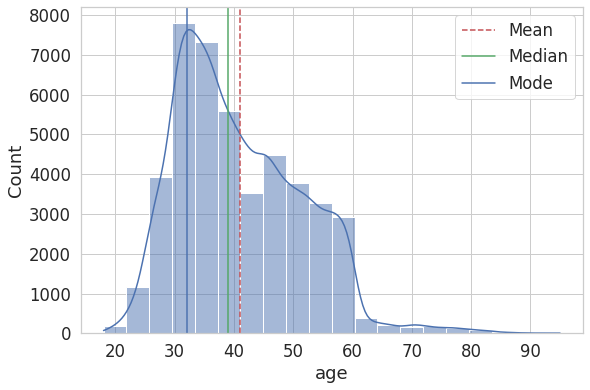

In [11]:
sns.set(rc={'figure.figsize':(9,6)}, font_scale=1.5, style='whitegrid')
mean=train_df['age'].mean()
median=train_df['age'].median()
mode=train_df['age'].mode().values[0]
ax = sns.histplot(train_df['age'], kde=True, bins=20)
ax.axvline(mean, color='r', linestyle='--', label="Mean")
ax.axvline(median, color='g', linestyle='-', label="Median")
ax.axvline(mode, color='b', linestyle='-', label="Mode")
ax.legend()

2. Balance field.  
The green line shows a median of 0. It means, most of the people contacted have nearly zero average yearly balance.

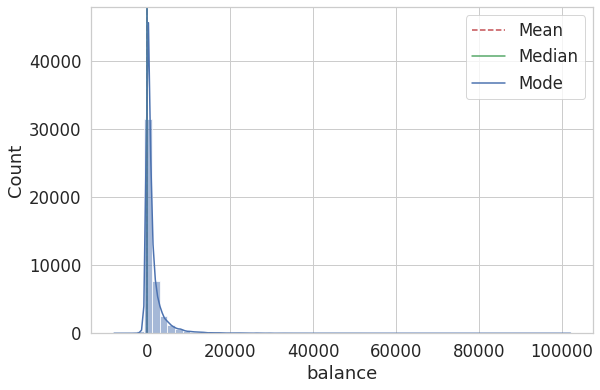

In [12]:
ax = sns.histplot(train_df['balance'], kde=True, bins=60)
ax.axvline(mean, color='r', linestyle='--', label="Mean")
ax.axvline(median, color='g', linestyle='-', label="Median")
ax.axvline(mode, color='b', linestyle='-', label="Mode")
ax.legend()

Below is a scatter to visualize whether there is a relationship between age and balance. The scatter plot shows there is no relationship between age and balance.

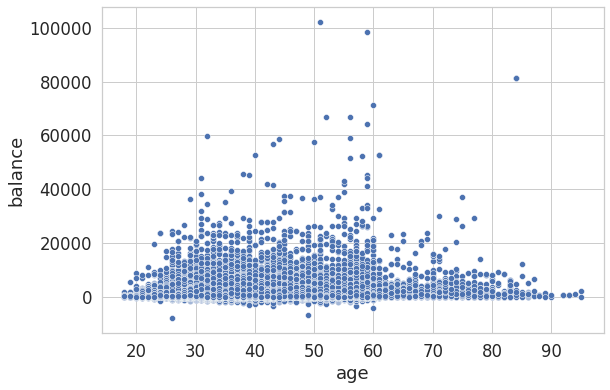

In [13]:
sns.scatterplot(x="age", y="balance", data=train_df)

Separating single and married marital status to visualize their relationship to each other with respect to balance.

In [14]:
marital_single = train_df['marital'].str.contains ('single', case=False, na=False)
marital_married = train_df['marital'].str.contains ('married', case=False, na=False)
marital_status = train_df[marital_single | marital_married]
marital_status.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [19]:

ax_box = sns.boxplot(data=(marital_status['balance'] < 60000.values()), x="marital", y="balance")

SyntaxError: ignored

Do the same for education level below.

In [ ]:
education_secondary = train_df['education'].str.contains ('secondary', case=False, na=False)
education_tertiary = train_df['education'].str.contains ('tertiary', case=False, na=False)
education_lvl = train_df[education_secondary | education_tertiary]
education_lvl.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no


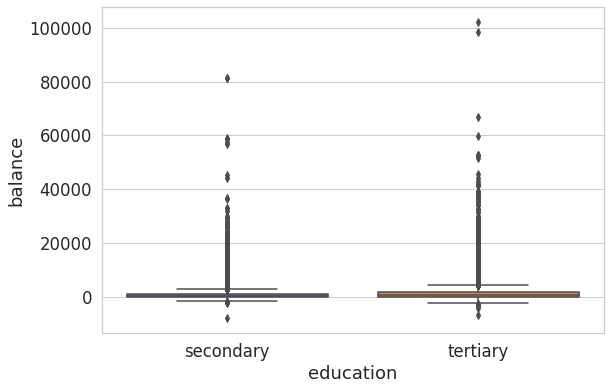

In [ ]:
ax_box = sns.boxplot(data=education_lvl, x="education", y="balance", order = education_lvl["education"].value_counts().index)

# Correlation Hypothesis
## Pearson Correlation Coefficient

In [ ]:
# For age and balance
train_df[['age', 'balance']].corr()

,age,balance
age,1.000000,0.097783
balance,0.097783,1.000000


The Pearson coefficient is close to 0, which implies that there is no relationship between the age and the average yearly balance. Are there relationships between the other fields? Apply this method to the entire DataFrame.

In [ ]:
# Pearson Correlation for the whole DataFrame
train_df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


There are no relationships between the other fields. The Pearson correlation test below also show the same coefficient. There is no relationship between age and balance even with a p-value `< 0.05`.

In [ ]:
stats.pearsonr(train_df['age'], train_df['balance'])

(0.09778273937134747, 1.8469874949280991e-96)

##Independent-samples t-test

**Null Hypothesis 1 (H<sub>0</sub>):**  
Marital status has no effect on account balances.

**Alternate Hypothesis 1 (H<sub>a</sub>):**  
Marital status does have an effect on account balances.

In [ ]:
# Function for confidence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")


In [ ]:
marital_single_1 = marital_status.iloc[(marital_status['marital'] == 'single').values]
marital_single_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12790 entries, 1 to 45205
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        12790 non-null  int64 
 1   job        12790 non-null  object
 2   marital    12790 non-null  object
 3   education  12790 non-null  object
 4   default    12790 non-null  object
 5   balance    12790 non-null  int64 
 6   housing    12790 non-null  object
 7   loan       12790 non-null  object
 8   contact    12790 non-null  object
 9   day        12790 non-null  int64 
 10  month      12790 non-null  object
 11  duration   12790 non-null  int64 
 12  campaign   12790 non-null  int64 
 13  pdays      12790 non-null  int64 
 14  previous   12790 non-null  int64 
 15  poutcome   12790 non-null  object
 16  y          12790 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.8+ MB


In [ ]:
marital_married_1 = marital_status.iloc[(marital_status['marital'] == 'married').values]
marital_married_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27214 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        27214 non-null  int64 
 1   job        27214 non-null  object
 2   marital    27214 non-null  object
 3   education  27214 non-null  object
 4   default    27214 non-null  object
 5   balance    27214 non-null  int64 
 6   housing    27214 non-null  object
 7   loan       27214 non-null  object
 8   contact    27214 non-null  object
 9   day        27214 non-null  int64 
 10  month      27214 non-null  object
 11  duration   27214 non-null  int64 
 12  campaign   27214 non-null  int64 
 13  pdays      27214 non-null  int64 
 14  previous   27214 non-null  int64 
 15  poutcome   27214 non-null  object
 16  y          27214 non-null  object
dtypes: int64(7), object(10)
memory usage: 3.7+ MB


In [ ]:
educ_secon = education_lvl.iloc[(education_lvl['education'] == 'secondary').values]
educ_secon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23202 entries, 1 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23202 non-null  int64 
 1   job        23202 non-null  object
 2   marital    23202 non-null  object
 3   education  23202 non-null  object
 4   default    23202 non-null  object
 5   balance    23202 non-null  int64 
 6   housing    23202 non-null  object
 7   loan       23202 non-null  object
 8   contact    23202 non-null  object
 9   day        23202 non-null  int64 
 10  month      23202 non-null  object
 11  duration   23202 non-null  int64 
 12  campaign   23202 non-null  int64 
 13  pdays      23202 non-null  int64 
 14  previous   23202 non-null  int64 
 15  poutcome   23202 non-null  object
 16  y          23202 non-null  object
dtypes: int64(7), object(10)
memory usage: 3.2+ MB


In [ ]:
educ_tert = education_lvl.iloc[(education_lvl['education'] == 'tertiary').values]
educ_tert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13301 entries, 0 to 45206
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        13301 non-null  int64 
 1   job        13301 non-null  object
 2   marital    13301 non-null  object
 3   education  13301 non-null  object
 4   default    13301 non-null  object
 5   balance    13301 non-null  int64 
 6   housing    13301 non-null  object
 7   loan       13301 non-null  object
 8   contact    13301 non-null  object
 9   day        13301 non-null  int64 
 10  month      13301 non-null  object
 11  duration   13301 non-null  int64 
 12  campaign   13301 non-null  int64 
 13  pdays      13301 non-null  int64 
 14  previous   13301 non-null  int64 
 15  poutcome   13301 non-null  object
 16  y          13301 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.8+ MB


# Results

In [ ]:
marital_status_ttest = stats.ttest_ind(marital_single_1['balance'], marital_married_1['balance'])
print(marital_status_ttest)

Ttest_indResult(statistic=-3.7947482407889943, pvalue=0.00014801100623716576)


Succeed to reject the **null hypothesis 1** at `p = 0.00014801100623716576` There is a difference of `3.79` standard deviations between the mean of balance between single and married clients.
The p-value is < 0.05, implying that this is a real difference.


In [ ]:
get_95_ci(marital_single_1['balance'], marital_married_1['balance'])

'The difference in means at the 95% confidence interval (two-tail) is between 62.17145161392069 and 186.68441909099442.'

In [ ]:
education_level_ttest = stats.ttest_ind(educ_secon['balance'], educ_tert['balance'])
print(education_level_ttest)

Ttest_indResult(statistic=-17.97585793512124, pvalue=6.158616290344418e-72)


Succeed to reject the **null hypothesis 2** at `p = 6.158616290344418e-72` There is a difference of `17.97` standard deviations between the mean of balance between single and married clients.
The p-value is < 0.05, implying that the difference is significant.

In [ ]:
get_95_ci(educ_secon['balance'], educ_tert['balance'])

'The difference in means at the 95% confidence interval (two-tail) is between 530.4574521025642 and 676.6138453282284.'

# Recommendation

The bank should target products to married clients and clients with a tertiary level of education for a higher possibility of generating revenue.